# AI/ML Challenge

Problem Statement

The anthropometric analysis of the human face is an essential study for performing craniofacial plastic and reconstructive surgeries. Facial anthropometrics are affected by various factors such as age, gender, ethnicity, socioeconomic status, environment, and region.  

 

Plastic surgeons who undertake the repair and reconstruction of facial deformities find the anatomical dimensions of the facial structures useful for their surgeries. These dimensions are a result of the Physical or Facial appearance of an individual. Along with factors like culture, personality, ethnic background, age; eye appearance and symmetry contributes majorly to the facial appearance or aesthetics. 

 

**Our objective is to build a model to scan the image of an eye of a patient and find if the gender of the patient is male or female**.

 The dataset contains eye pictures of males and females. The dataset can be downloaded from the below link.

 

Dataset Link: https://drive.google.com/file/d/1f7uslI-ZHidriQFZR966_aILjlkgDN76/view?usp=sharing

From the above link, you will be able to download a zip file named ‘eye_gender_data.zip’. After you extract this zip file, you will get four files:


*  **train** - contains all the images that are to be used for training your model.

*   **Training_set.csv** - this csv file has contains the labels for the training images

*   **test** - contains 9000+ images. For these images you are required to make predictions

*   **Testing_set.csv** - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you submit are with their image’s filename in the same order as given in this file.

*   **sample_submission.csv** - this is the sample submission file for the data sprint


**Saving Prediction File & Sample Submission**

You can find more details on how to save a prediction file here: https://discuss.dphi.tech/t/how-to-submit-predictions/548

 

Sample submission: You should submit a CSV file with a header row and the sample submission can be found below:

 

**label**

male

female

female

female

male

female

male

female

.

.

.

Etc.

Note that the header name should be ‘label’ else it will throw an evaluation error.

 

Getting Started Notebook

Link: https://dphi.tech/notebooks/2866/dphi_official/5-week-deep-learning-bootcamp-final-assignment-getting-started-notebook


Acknowledgement

The dataset is sourced from Ruskino RU. We thank PavelBiz for this dataset.

Resources

[Sample Submission](https://s3.us-west-1.wasabisys.com/dphi/datasets/225/Sample_Submission.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=WUQBtNrZF%2FZFWDoF8TsY1DAndJs%3D&Expires=1673977447)

[Train Data](https://s3.us-west-1.wasabisys.com/dphi/datasets/225/Train_Data.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=zUz3iD6aFIupuh0ASn3Jq067PYs%3D&Expires=1673977786)

[Test Data](https://s3.us-west-1.wasabisys.com/dphi/datasets/225/Test_Data.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=IkKwlNNCcNKwaj1UnOG6A4NxyIg%3D&Expires=1673977786)

Submission guidelines

1. Your predictions file must be a CSV and its first row i.e header field must be label

2. You must upload .ipynb notebook file as a solution to the question

Evaluation Metric

Accuracy evaluation metric is used for evaluating model predictions

Additional guidelines

Submissions are evaluated using Accuracy Score and the score displayed on the leaderboard is 100 * Accuracy Score.

 

**How do we do it?** 

Once we release the data, anyone can download it, build a model, and make a submission. We give competitors a set of data (training data), with both the independent and dependent variables.

We also release another set of data (test dataset) with just the independent variables, and we hide the dependent variable that corresponds with this set. You submit the predicted values of the dependent variable for this set and we compare it against the actual values. 

The predictions are evaluated based on the evaluation metric defined in the datathon.

 

*Note: Notebook submission is mandatory for every bootcampers in order to be eligible to receive the certificate*.



Import the required packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
!unzip eye_gender_data.zip


Streaming output truncated to the last 5000 lines.
  inflating: eye_gender_data/train/Image_4799.jpg  
  inflating: eye_gender_data/train/Image_48.jpg  
  inflating: eye_gender_data/train/Image_480.jpg  
  inflating: eye_gender_data/train/Image_4800.jpg  
  inflating: eye_gender_data/train/Image_4801.jpg  
  inflating: eye_gender_data/train/Image_4802.jpg  
  inflating: eye_gender_data/train/Image_4803.jpg  
  inflating: eye_gender_data/train/Image_4804.jpg  
  inflating: eye_gender_data/train/Image_4805.jpg  
  inflating: eye_gender_data/train/Image_4806.jpg  
  inflating: eye_gender_data/train/Image_4807.jpg  
  inflating: eye_gender_data/train/Image_4808.jpg  
  inflating: eye_gender_data/train/Image_4809.jpg  
  inflating: eye_gender_data/train/Image_481.jpg  
  inflating: eye_gender_data/train/Image_4810.jpg  
  inflating: eye_gender_data/train/Image_4811.jpg  
  inflating: eye_gender_data/train/Image_4812.jpg  
  inflating: eye_gender_data/train/Image_4813.jpg  
  inflating: eye_

Create paths for the Train and Test data

In [3]:
train_path = "/content/eye_gender_data/train"
test_path = "/content/eye_gender_data/test"


Plot a few images of train data.


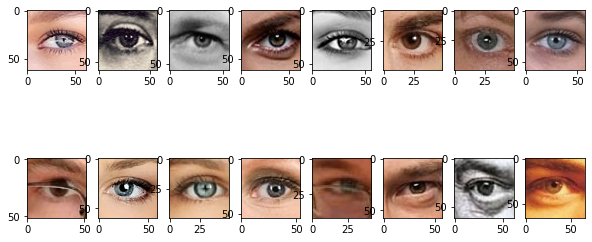

In [4]:
image_path = os.listdir(train_path)

fig = plt.figure(figsize=(10,5))
for e in range(len(image_path[:16])):
  plt.subplot(2,8,e+1)
  img = plt.imread(os.path.join(train_path,image_path[e]))
  plt.imshow(img, cmap=plt.get_cmap('gray'))


Load the Pandas DataFrame


In [5]:
train_df = pd.read_csv('/content/eye_gender_data/Training_set.csv')
test_df = pd.read_csv('/content/eye_gender_data/Testing_set.csv')


In [6]:
print(len(train_df))
train_df.head()


9220


,filename,label
0,Image_1.jpg,male
1,Image_2.jpg,female
2,Image_3.jpg,female
3,Image_4.jpg,female
4,Image_5.jpg,male


In [7]:
train_df['label'].value_counts()


male      5058
female    4162
Name: label, dtype: int64

In [8]:
train_df['target'] = train_df['label'].replace({'female': '0', 'male': '1'})
train_df.head()


,filename,label,target
0,Image_1.jpg,male,1
1,Image_2.jpg,female,0
2,Image_3.jpg,female,0
3,Image_4.jpg,female,0
4,Image_5.jpg,male,1


In [9]:
test_df.head()


,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


Initialize Keras’ ImageDataGenerator class


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.1,
)  # Here is my train_test_split

test_datagen = ImageDataGenerator(rescale=1 / 255.0)


Initialize our training generator


In [11]:
batch_size = 10  # Here is my batch size for hyperparameter tuning
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_path,
    x_col="filename",
    y_col="target",
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode="binary",
    subset="training",
    shuffle=True,
    seed=42,
)


Found 8298 validated image filenames belonging to 2 classes.


Initialize our validation generator


In [12]:
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_path,
    x_col="filename",
    y_col="target",
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",
    shuffle=True,
    seed=42,
)


Found 922 validated image filenames belonging to 2 classes.


Initialize our testing generator


In [13]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_path,
    x_col="filename",
    target_size=(100, 100),
    batch_size=1,
    class_mode=None,
    shuffle=False,
)


Found 2305 validated image filenames.


Now we will use a pretrained model Xception from Keras library


In [14]:
pretrained_model = keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(100, 100, 3),
    pooling=None,
    classes=2,
    classifier_activation="sigmoid",
)


83683744/83683744 [==============================] - 3s 0us/step


Initialize a Sequential model, freeze the pretrained model layers


In [15]:
model = Sequential()
for layer in pretrained_model.layers:
  layer.trainable=False
  

Now add the pretrained model, flatten the output, add one additional hidden fully connected layer, and the last output layer to classify only 2 categories for our male and female


In [16]:
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Check the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 2048)              37750784  
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 58,616,362
Trainable params: 37,754,882
Non-trainable params: 20,861,480
_________________________________________________________________


Compile the new model


In [17]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

Fit the model on the training dataset and check with the validation set


In [18]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=valid_generator.n // valid_generator.batch_size,
    epochs=10,
)


Epoch 1/10
829/829 [==============================] - 46s 44ms/step - loss: 0.4097 - accuracy: 0.8370 - val_loss: 0.3120 - val_accuracy: 0.8728
Epoch 2/10
829/829 [==============================] - 35s 42ms/step - loss: 0.3339 - accuracy: 0.8574 - val_loss: 0.3172 - val_accuracy: 0.8739
Epoch 3/10
829/829 [==============================] - 35s 42ms/step - loss: 0.3102 - accuracy: 0.8707 - val_loss: 0.3137 - val_accuracy: 0.8739
Epoch 4/10
829/829 [==============================] - 35s 42ms/step - loss: 0.3031 - accuracy: 0.8716 - val_loss: 0.2790 - val_accuracy: 0.8913
Epoch 5/10
829/829 [==============================] - 36s 43ms/step - loss: 0.2928 - accuracy: 0.8792 - val_loss: 0.3038 - val_accuracy: 0.8761
Epoch 6/10
829/829 [==============================] - 35s 42ms/step - loss: 0.2857 - accuracy: 0.8812 - val_loss: 0.3055 - val_accuracy: 0.8761
Epoch 7/10
829/829 [==============================] - 35s 42ms/step - loss: 0.2811 - accuracy: 0.8824 - val_loss: 0.2622 - val_accuracy:

Evaluate our model performance


In [19]:
score = model.evaluate(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


93/93 [==============================] - 4s 41ms/step - loss: 0.2680 - accuracy: 0.8829
Test loss: 0.2679678797721863
Test accuracy: 0.8828633427619934


Plot the training and validation accuracy and losses 

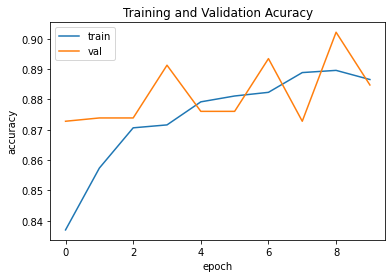

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Acuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


Plot the training and validation losses


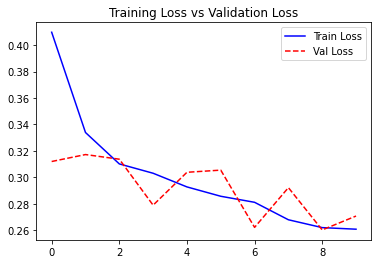

In [21]:
data = history.history
y1 = data['loss']
y2 = data['val_loss']
x = [i for i in range(len(y1))]
plt.plot(x, y1, 'b-', label='Train Loss')
plt.plot(x, y2, 'r--', label='Val Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()


Plot the training and validation accuracy


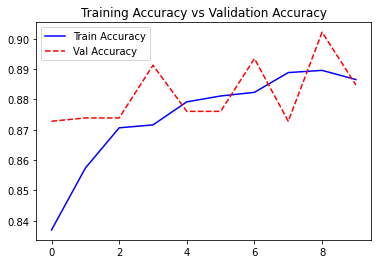

In [22]:
y1 = data['accuracy']
y2 = data['val_accuracy']
x = [i for i in range(len(y1))]
plt.plot(x, y1, 'b-', label='Train Accuracy')
plt.plot(x, y2, 'r--', label='Val Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.show()


Make predictions on test data using predict from Keras


In [23]:
preds = model.predict(test_generator, steps = len(test_generator.filenames))
# predict returns the class probability of each class. 
# print the prediction of the first 5 test data
preds[:5]


2305/2305 [==============================] - 18s 8ms/step


array([[0.02342378, 0.95013976],
       [0.20664373, 0.8273582 ],
       [0.06936202, 0.86037457],
       [0.34952322, 0.45534462],
       [0.0942577 , 0.6249975 ]], dtype=float32)

Predict the class label


In [24]:
preds = preds.argmax(axis=-1)
preds

array([1, 1, 1, ..., 1, 1, 1])

Add the predictions to a dataframe


In [25]:
# Create Dataframe of predicted value with particular respective index
submission = pd.DataFrame(preds) 
submission.columns = ["label"] # names the column
# add label names to test dataframe
submission['target'] = submission.label.replace({0: 'female', 1: 'male'})
# drop the label column from the test_df data
submission = submission.drop('label', axis=1)
# change the name of the target column to label as recommended for submission
submission = submission.rename(columns={'target':'label'})



Prepare a submission File

In [28]:
# convert the submission_df to a csv file
submission.to_csv('submission.csv', index=False)
# check the first five rows to see how it looks
submission.head(5)


,label
0,male
1,male
2,male
3,male
4,male


Check the submission file before uploading to competition


In [29]:
!head submission.csv


label
male
male
male
male
male
male
female
male
male
